# Support Vector Machine and Support Vector Regression

The first graph shows Simple Linear Regression.<br>
The second graph shows SVM.<br>
In second graph instead of a regression line a tube is drawn called Insensitive Tube. and the width of tube measured from the regression line is E(epsolone).<br>
In graph 1 we care about the error ie the distance between the point and regression line, but in second line we do not care about the distance becuse the point lies in the tube. And this is the key behind the SVM. The point outisde the tube contribute to the error.<br>
The formula for the error is given.

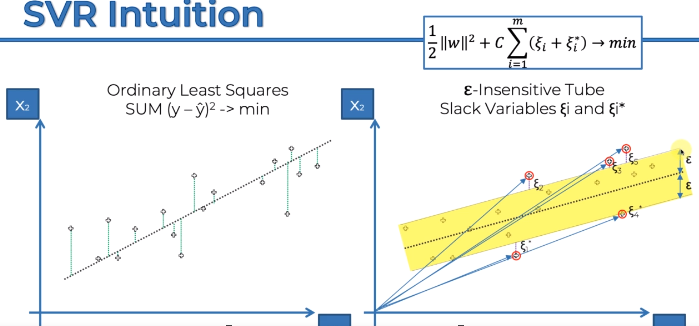

The points inside the tube support the tube and the points can be represented as 2D vector, so the name Support Vector Machine and Support Vector Regression.

## STEP 1 - Date Pre-Processing

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [96]:
df=pd.read_csv('Salary.csv')
df.head()

,Level,YearsExperience,Salary
0,1,1.1,39343
1,2,1.3,46205
2,3,1.5,37731
3,4,2.0,43525
4,5,2.2,39891


In [125]:
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [126]:
x_data=x
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]])

In [127]:
y=y.reshape(len(y),1)

In [128]:
y_data=y;
y

array([[ 39343],
       [ 46205],
       [ 37731],
       [ 43525],
       [ 39891],
       [ 56642],
       [ 60150],
       [ 54445],
       [ 64445],
       [ 57189],
       [ 63218],
       [ 55794],
       [ 56957],
       [ 57081],
       [ 61111],
       [ 67938],
       [ 66029],
       [ 83088],
       [ 81363],
       [ 93940],
       [ 91738],
       [ 98273],
       [101302],
       [113812],
       [109431],
       [105582],
       [116969],
       [112635],
       [122391],
       [121872],
       [127345],
       [126756],
       [128765],
       [135675],
       [139465]], dtype=int64)

### Feature Scaling 

In [129]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
x = sc_X.fit_transform(x)
y = sc_y.fit_transform(y)

In [130]:
print(x)

[[-1.46]
 [-1.4 ]
 [-1.35]
 [-1.21]
 [-1.15]
 [-0.96]
 [-0.93]
 [-0.87]
 [-0.87]
 [-0.73]
 [-0.68]
 [-0.65]
 [-0.65]
 [-0.62]
 [-0.51]
 [-0.39]
 [-0.34]
 [-0.28]
 [-0.11]
 [-0.09]
 [ 0.14]
 [ 0.22]
 [ 0.45]
 [ 0.53]
 [ 0.67]
 [ 0.75]
 [ 0.89]
 [ 0.92]
 [ 1.12]
 [ 1.18]
 [ 1.37]
 [ 1.46]
 [ 1.68]
 [ 1.85]
 [ 2.02]]


In [131]:
print(y)

[[-1.41]
 [-1.19]
 [-1.46]
 [-1.28]
 [-1.39]
 [-0.86]
 [-0.75]
 [-0.93]
 [-0.62]
 [-0.84]
 [-0.65]
 [-0.89]
 [-0.85]
 [-0.85]
 [-0.72]
 [-0.5 ]
 [-0.57]
 [-0.03]
 [-0.08]
 [ 0.32]
 [ 0.25]
 [ 0.45]
 [ 0.55]
 [ 0.94]
 [ 0.8 ]
 [ 0.68]
 [ 1.04]
 [ 0.91]
 [ 1.21]
 [ 1.2 ]
 [ 1.37]
 [ 1.35]
 [ 1.41]
 [ 1.63]
 [ 1.75]]


In [132]:
kernel=['linear','rbf','poly']

Accuracy by linear kernel 0.964831424838288


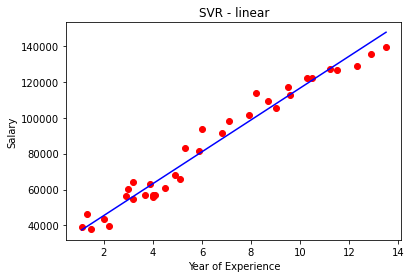

 
 
Accuracy by rbf kernel 0.9749605087921769


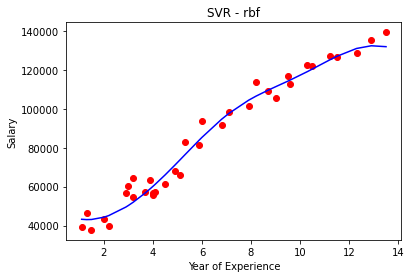

 
 
Accuracy by poly kernel 0.6371259952762403


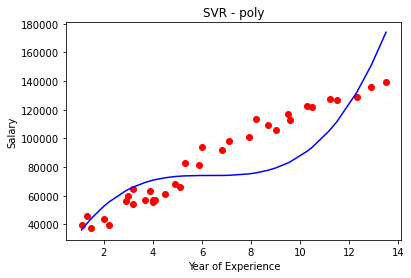

In [139]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

for i in kernel:
    svr= SVR(kernel = i)
    svr.fit(x, y.ravel())
    
    y_pred = sc_y.inverse_transform(svr.predict(sc_X.transform(x_data)))
    acc=r2_score(y_data, y_pred)
    
    print("Accuracy by "+i+" kernel",acc)
    
    
    
    plt.scatter(sc_X.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
    plt.plot(sc_X.inverse_transform(x), sc_y.inverse_transform(svr.predict(x)), color = 'blue')
    plt.title('SVR - '+i)
    plt.xlabel('Year of Experience')
    plt.ylabel('Salary')
    plt.show()
    print(" ")
    print(" ")
    

It can be concluded that highest accuracy is obtained using rbf kernel (97.49%) followed by linear kernel (96.48%) and poly kernel (63.71%).